# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [3]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

#generate random numbers for df
#r <- runif(sample_size, age_lo, age_hi)

#mean_r  <- mean(r)
#generate mean(r)

#generate x values
#x = (beta_xa + beta_x0 + rnorm(1, mean_x, sd_x))
#x

#generate c values
#c = (beta_ca + beta_cx + beta_c0 + rnorm(1, mean_r, sd_c))

#dat = data.frame(r, x, c)
#dat

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
    
    r <- runif(sample_size, age_lo, age_hi)
    output_x = data.frame()
    output_c = data.frame()
    mean_r  <- mean(r) #generate mean(r)
    
    for (item in 1:sample_size)
        #x = (beta_xa + beta_x0 + rnorm(1, mean_x, sd_x))
        output_x = rbind(output_x, (beta_xa + beta_x0 + rnorm(1, mean_r, sd_x)))
    
    for (item in 1:sample_size)
        #x = (beta_xa + beta_x0 + rnorm(1, mean_x, sd_x))
        output_c = rbind(output_c, (beta_ca + beta_cx + beta_c0 + rnorm(1, mean_r, sd_c)))
    
    output = data.frame("age" = r, output_x, output_c)
    colnames(output)[2] ="x"
    colnames(output)[3] ="c"
    
    return(output)
      
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,156.61179,192.11998,122.42930
2,178.20767,156.61552,149.70118
3,151.34812,68.73043,49.07987
4,179.12549,103.61325,176.60868
5,104.67675,45.64182,62.36982
6,97.98153,99.55628,36.69630


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [4]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


a) Plot the relationship between age and reading comprehension. 

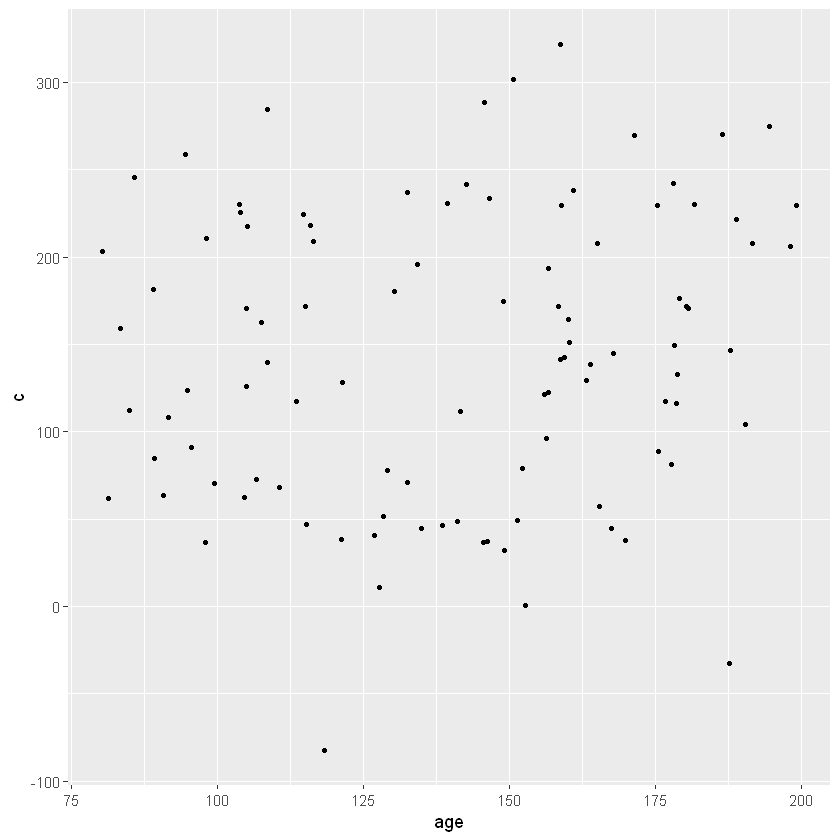

In [5]:
# WRITE YOUR CODE HERE
gg  <- ggplot(dat, aes(age, c))
gg + geom_point(size = 1)

b) Plot the relationship between reading experience, age, and reading comprehension.

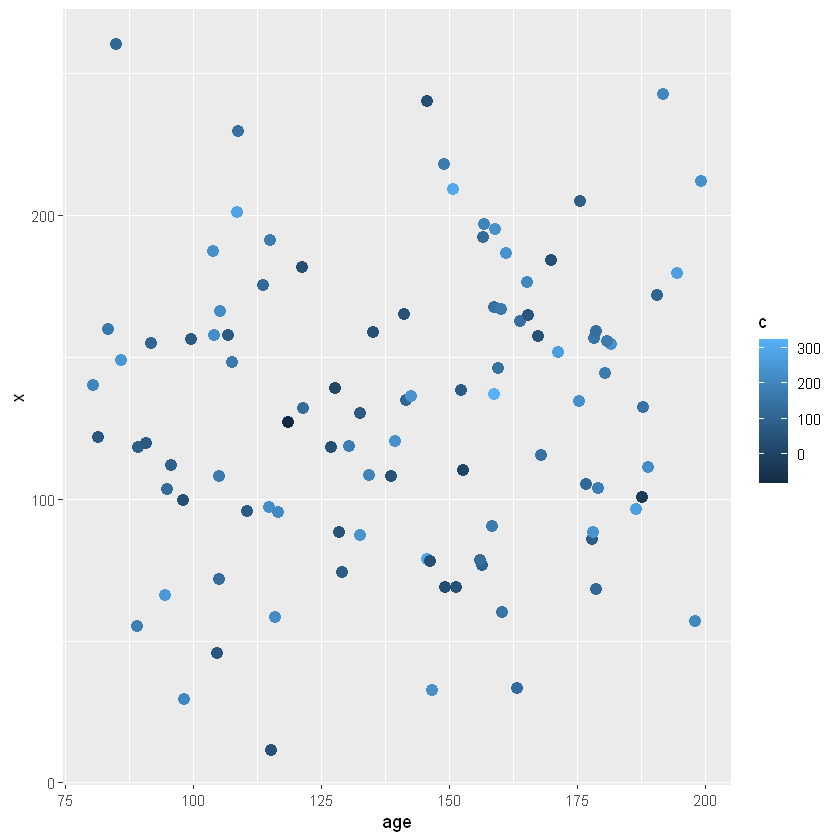

In [6]:
# WRITE YOUR CODE HERE
gg  <- ggplot(dat, aes(age, x, color = c))
gg + geom_point(size = 3, alpha = 1)

---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [7]:
install.packages("mediation") # uncomment to install the mediation package. 
library(mediation)

Installing package into 'C:/Users/roman/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'mediation' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roman\AppData\Local\Temp\Rtmp2lSsfs\downloaded_packages


Warning message:
"package 'mediation' was built under R version 4.2.3"
Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: mvtnorm

Loading required package: sandwich

Warning message:
"package 'sandwich' was built under R version 4.2.3"
mediation: Causal Mediation Analysis
Version: 4.5.0




Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [8]:
# WRITE YOUR CODE HERE
fitM <- lm(x ~ age,     data=dat) #Step 1: IV on M, Number of passengers predicting weight of car
fitY <- lm(c ~ x + age, data=dat) #Step 2: IV and M on DV, Number of passengers and weight predicting highway
#summary(fitM)
#summary(fitY)
fitMed <- mediate(fitM, fitY, treat= "age", mediator= "c")
summary(fitMed)


Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value
ACME              0.000        0.000         0.00    1.00
ADE               0.320       -0.188         0.81    0.18
Total Effect      0.320       -0.188         0.81    0.18
Prop. Mediated    0.000        0.000         0.00    1.00

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> *Write your response here* 
> According to our simulated model, word reading experience does not mediate age and comprehension. This could be because the sample size is too low or because there is too much noise, or too many outliers in our data. Otherwise, given that our simulation accurtely models the population of interest, I would guess that it is because age is too strong of a correlate in and of itself to reading comprehension to be eclipsed by word reading experience. 

**DUE:** 5pm EST, April 3, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*